# Problem Set #5

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint

## Problem 1

### (a)

$\frac{1}{\xi^{2}}\frac{d}{d\xi}(\xi^{2}\frac{du}{d\xi}) = e^{-u}$ <br>
$\frac{d}{d\xi}(\xi^{2}\frac{du}{d\xi}) = e^{-u}\xi^{2}$ <br>
$2\xi\frac{du}{d\xi}+\xi^{2}\frac{d^{2}u}{d\xi^{2}} = e^{-u}\xi^{2}  $


이 때 
$u(\xi) = a_{0}+a_{1}\xi + a_{2}\xi^{2}+a_{3}\xi^{3} + a_{4}\xi^{4}$ 로 근사할 수 있다. <br>
이를 $\frac{d}{d\xi}(\xi^{2}\frac{du}{d\xi}) = e^{-u}\xi^{2}$에 대입하자. <br>
이 때 $\xi$는 작은 값이므로 $\xi^5$ 이상의 차수를 가지는 항은 0으로 근사하여 무시할 수 있다. 그러면 다음과 같은 식을 얻게 된다. 
<br>

$2a_{1}\xi + 6a_{2}\xi^{2} + 12a_{3}\xi^{3} + 20a_{4}\xi^{4} = (1-a_{0}+\frac{1}{2}a_{0}^{2})\xi^{2} + (-a_{1}+a_{0}a_{1})\xi^{3} + (-a_{2}+a_{0}a_{2} + \frac{1}{2}a_{1}^{2})\xi^{4} $ <br>
$u(\xi) = a_{0}+a_{1}\xi + a_{2}\xi^{2}+a_{3}\xi^{3} + a_{4}\xi^{4}$에서 $\xi = 0 일때, u(\xi)=0$ 이므로 $a_{0} = 0$ <br>
이를 이용하여 계수를 비교하면 다음과 같이 a 값들을 얻을 수 있다. 
<br> <br>
$a_{0} = 0$ <br>
$a_{1} = 0$ <br>
$a_{2} = \frac{1}{6}$ <br>
$a_{3} = 0$ <br>
$a_{4} = \frac{-1}{120}$ <br>



### (b)

$2\xi\frac{du}{d\xi}+\xi^{2}\frac{d^{2}u}{d\xi^{2}} = e^{-u}  $ <br>

$\frac{du}{d\xi} = u'$으로 두면 <br>
$\frac{2}{\xi} u' + u'' =  e^{-u}$ <br>
위의 식과 같은 미분 방정식을 얻을 수 있다. <br><br>
단, 이 때 작은 값의 $\xi$에 대해서 <br>
$u(\xi) = a_{0}+a_{1}\xi + a_{2}\xi^{2}+a_{3}\xi^{3} + a_{4}\xi^{4}$ 이므로 <br>
$u(0.1) \approx 0.00166583$, $u'(0.1) \approx 0.0333$ 이다. <br>
$u(0) = 0, u'(0) = 0 $ 이다.

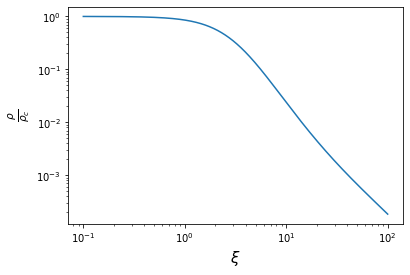

In [16]:

from scipy.integrate import odeint

def deriv(y, epsilon):
    e = epsilon
    dude1 = y[1]
    dude2 = -2/e * y[1] + np.exp(-y[0])
    return [dude1,dude2]


def u_approximation(x):
    return 1/6 * x**2 -1/120 * x**4

def dude_approximation(x):
    return 1/3 * x - 1/30 * x**3


epsilonini = 10**-1
epsilonmax = 10**2
n = 10000

uini = np.array([u_approximation(epsilonini),dude_approximation(epsilonini)])
# uini= np.array([0,0])

epsilon = np.linspace(epsilonini, epsilonmax, n)
y = odeint(deriv, uini, epsilon)
u = y[:,0]
uprime = y[:,1]

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\xi$', size = 15)
plt.ylabel(r'$\frac{\rho}{\rho_{c}}$', size = 15)

plt.plot(epsilon, np.exp(-u))


### (c)

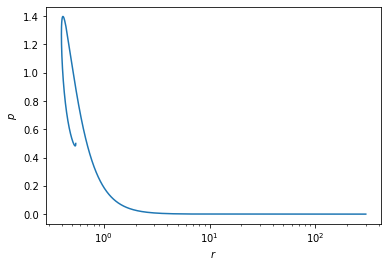

In [13]:
xi =np.linspace(0.1,100,10000)

rho_ratio=np.exp(-u)
m=1/np.sqrt(4*np.pi)*xi**2*(uprime)
p=m**2*rho_ratio

r = pow(xi*uprime, -1)

plt.xlabel(r'$r$')
plt.ylabel(r'$p$')

plt.plot(r,p)
plt.xscale('log')

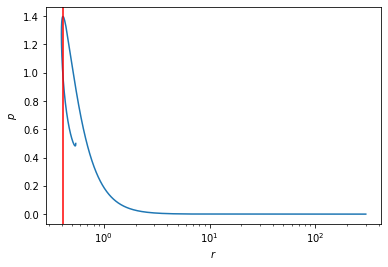

In [14]:
plist = list(p)
pmax = np.max(p)
index1 = plist.index(pmax)
critic_r=r[index1]
critic_xi = xi[index1]
plt.plot(r,p)

plt.xlabel(r'$r$')
plt.ylabel(r'$p$')

plt.xscale('log')
plt.axvline(critic_r, color = 'red')

In [25]:
print('the values of r where p is maximized is {:.4f}'.format(critic_r))

print('the values of ξ where p is maximized is {:.4f}'.format(critic_xi))


the values of r where p is maximized is 0.4107
the values of ξ where p is maximized is 6.4543


## Problem 2


### (a)

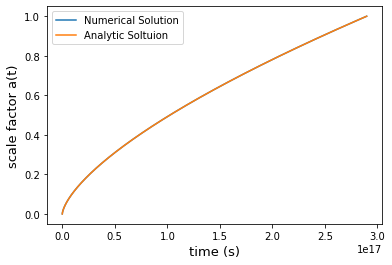

In [9]:
from scipy.integrate import odeint

H0 = 71/(3.086*10**19)

def deriv(a, t):
    dadt = pow((1/a)*H0**2, 0.5)
    return dadt

tini= 0
tmax = 2/(3*H0)
n = 10000

aini = np.array([0.0001]) 
t = np.linspace(tini, tmax, n)
y = odeint(deriv, aini, t)
a = y[:,0]

plt.plot(t, a, label = 'Numerical Solution')

def a1(t):
    return pow(1.5*H0*t, 2/3)

result1 = a1(t)
plt.plot(t, result1, label = 'Analytic Soltuion')
plt.xlabel('time (s)', size = 13)
plt.ylabel('scale factor a(t)', size = 13)
plt.legend()

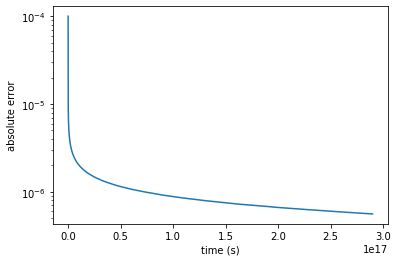

In [10]:
error = abs(a - result1)
plt.plot(t, error)
plt.ylabel('absolute error')
plt.xlabel('time (s)')
plt.yscale('log') 


numerical solution을 analytic solution과 비교하여 absoulte error을 구하면 위와 같은 그래프로 나타낼 수 있으며, 이 error가 매우 작은 값이므로 두 solution은 거의 일치한다는 것을 확인할 수 있었다. 

### (b)

the current age of the Universe is 13.68 Gyrs


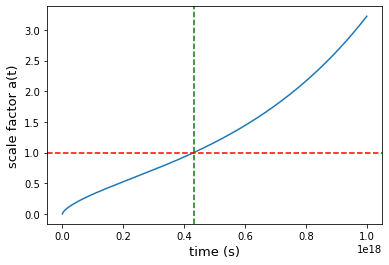

In [11]:
from scipy.integrate import odeint

H0 = 71/(3.086*10**19) # 단위를 /s 로 통일


ohmR = 3*10**-5
ohmk = 0
ohmM = 0.27
ohmA = 0.73


def deriv(a, t):
    dadt = np.sqrt(a**2 * H0**2 * (ohmR/a**4 + ohmM/a**3 + ohmk/a**2 + ohmA)) 
    return dadt

tini= 0
tmax = 10**18

n = 50000

aini = np.array([1e-14]) 
t = np.linspace(tini, tmax, n)
y = odeint(deriv, aini, t)
a = y[:,0]

for i in range(n):
    if a[i]>1:
        answer = t[i]
        break

Gyr = 3.154 * 10**16



plt.plot(t, a)
plt.axhline(1, color = 'red', linestyle = '--')
plt.axvline(answer, color = 'green', linestyle = '--')
plt.xlabel('time (s)', size = 13)
plt.ylabel('scale factor a(t)', size = 13)




print("the current age of the Universe is {:.2f} Gyrs".format(answer/Gyr))


### (c)

the time Universe switech from decelrating to accelrating expansion is 7.08 Gyrs
the redshift at that time is 0.754806
the Hubble parameter at that time is 0.0000000000000000034041771/s
the Hubble parameter at that time is 105.0529km/s/Mpc


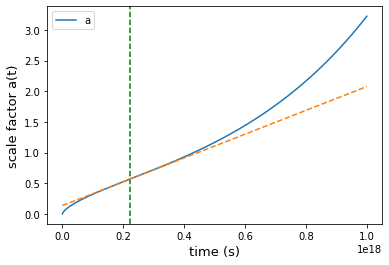

In [25]:
def dadt1(a):
    return np.sqrt(a**2 * H0**2 * (ohmR/a**4 + ohmM/a**3 + ohmk/a**2 + ohmA)) 

Gyr = 3.154 * 10**16

dadt = dadt1(a)
for i in range(np.size(dadt)):
    if i <10:
        continue
    else:
        if dadt[i]-dadt[i-1]>0:
            criptime = t[i]
            cripa = a[i]
            cripz = 1/a[i] - 1
            cripdadt = dadt[i]
            break

            
plt.axvline(criptime, color = 'green', linestyle = '--')
           
plt.plot(t, a, label = 'a')
plt.plot(t, cripdadt*t + (cripa-criptime*cripdadt), '--')
plt.xlabel('time (s)', size = 13)
plt.ylabel('scale factor a(t)', size = 13)
plt.legend()



print('the time Universe switech from decelrating to accelrating expansion is {:.2f} Gyrs'.format(criptime/Gyr))
print('the redshift at that time is {:.6f}'.format(cripz))
print('the Hubble parameter at that time is {:.25f}/s'.format(1/cripa * cripdadt))
print('the Hubble parameter at that time is {:.4f}km/s/Mpc'.format(1/cripa * cripdadt*3.086*10**19))


## Problem 3


### (a)

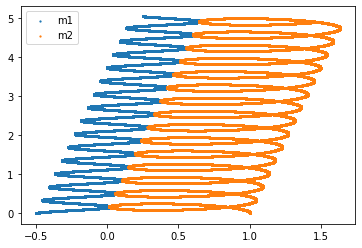

In [22]:
G = 6.67*10**-11
m1 = 1
m2 = 0.5
AU = 1.5e11

def accel(x1, y1, x2, y2, t):
    r12= np.sqrt((x1-x2)**2 + (y1-y2)**2)
    
    fvx1=-m2*(x1-x2)/(r12**3)
    fvy1=-m2*(y1-y2)/(r12**3)
    fvx2=-m1*(x2-x1)/(r12**3)
    fvy2=-m1*(y2-y1)/(r12**3)

    
    return [fvx1, fvy1, fvx2, fvy2]


x_1,y_1 = -0.5, 0
x_2, y_2 = 1,0
v_x1, v_y1 = 0.01, 0.05
v_x2, v_y2 = 0.02, 0.2


x1=[x_1]
y1=[y_1]
vx1=[v_x1]
vy1=[v_y1]

x2=[x_2]
y2=[y_2]
vx2=[v_x2]
vy2=[v_y2]


T=[0]
t=0
tmax=50
f=accel(x_1, y_1, x_2, y_2, t)
dt=0.0001
hdt=dt/2

v_x1=v_x1+hdt*f[0]
v_y1=v_y1+hdt*f[1]
v_x2=v_x2+hdt*f[2]
v_y2=v_y2+hdt*f[3]

t=t + hdt

while(t<=tmax):
    x_1=x_1+dt*v_x1
    y_1=y_1+dt*v_y1
    x_2=x_2+dt*v_x2
    y_2=y_2+dt*v_y2    
    # print('{}{}{}{}'.format(v_x1,v_y1,v_x2,v_y2))
    t=t+hdt
    
    f=accel(x_1, y_1, x_2, y_2, t)
    # print(f)
    v_hx1=v_x1+hdt*f[0]
    v_hy1=v_y1+hdt*f[1]
    v_hx2=v_x2+hdt*f[2]
    v_hy2=v_y2+hdt*f[3]
    
    
    x1.append(x_1)
    y1.append(y_1)
    x2.append(x_2)
    y2.append(y_2)   
    
    vx1.append(v_hx1)
    vy1.append(v_hy1)
    vx2.append(v_hx2)
    vy2.append(v_hy2)

    v_x1=v_x1+dt*f[0]
    v_y1=v_y1+dt*f[1]
    v_x2=v_x2+dt*f[2]
    v_y2=v_y2+dt*f[3]
    
    t=t+hdt
    T.append(t)

plt.scatter(x1, y1, s=1.5, label = 'm1')
plt.scatter(x2, y2, s=1.5, label = 'm2')
plt.legend()



### (b)

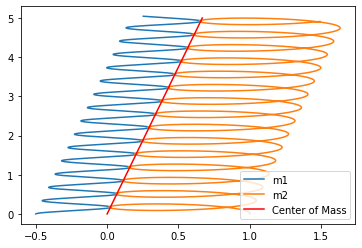

In [27]:
x1array = np.array(x1)
x2array = np.array(x2)
y1array = np.array(y1)
y2array = np.array(y2)

com_x = (m1*x1array+m2*x2array)/(m1+m2)
com_y = (m1*y1array+m2*y2array)/(m1+m2)


plt.plot(x1, y1,label = 'm1')
plt.plot(x2, y2,label = 'm2')
plt.plot(com_x, com_y, color = 'red', label = 'Center of Mass')
plt.legend()


### (c)

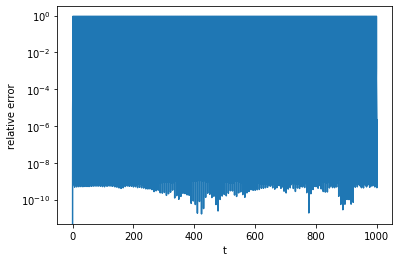

In [5]:
G = 6.67*10**-11
m1 = 1
m2 = 0.5
AU = 1.5e11

def accel(x1, y1, x2, y2, t):
    r12= np.sqrt((x1-x2)**2 + (y1-y2)**2)
    
    fvx1=-m2*(x1-x2)/(r12**3)
    fvy1=-m2*(y1-y2)/(r12**3)
    fvx2=-m1*(x2-x1)/(r12**3)
    fvy2=-m1*(y2-y1)/(r12**3)

    
    return [fvx1, fvy1, fvx2, fvy2]


x_1,y_1 = -0.5, 0
x_2, y_2 = 1,0
v_x1, v_y1 = 0.01, 0.05
v_x2, v_y2 = 0.02, 0.2




r12= np.sqrt((x_1-x_2)**2 + (y_1-y_2)**2)
Etot=0.5*m1*(v_x1**2+v_y1**2)+0.5*m2*(v_x2**2+v_y2**2)-m1*m2/r12
E0=np.array([0.5*m1*(v_x1**2+v_y1**2)+0.5*m2*(v_x2**2+v_y2**2)-m1*m2/r12])
E=[Etot]

x1=[x_1]
y1=[y_1]
vx1=[v_x1]
vy1=[v_y1]

x2=[x_2]
y2=[y_2]
vx2=[v_x2]
vy2=[v_y2]


T=[0]
t=0
tmax=1000
f=accel(x_1, y_1, x_2, y_2, t)
dt=0.0001
hdt=dt/2

v_x1=v_x1+hdt*f[0]
v_y1=v_y1+hdt*f[1]
v_x2=v_x2+hdt*f[2]
v_y2=v_y2+hdt*f[3]

t=t + hdt

while(t<=tmax):
    x_1=x_1+dt*v_x1
    y_1=y_1+dt*v_y1
    x_2=x_2+dt*v_x2
    y_2=y_2+dt*v_y2    
    # print('{}{}{}{}'.format(v_x1,v_y1,v_x2,v_y2))
    t=t+hdt
    
    f=accel(x_1, y_1, x_2, y_2, t)
    # print(f)
    v_hx1=v_x1+hdt*f[0]
    v_hy1=v_y1+hdt*f[1]
    v_hx2=v_x2+hdt*f[2]
    v_hy2=v_y2+hdt*f[3]
    
    
    x1.append(x_1)
    y1.append(y_1)
    x2.append(x_2)
    y2.append(y_2)   
    
    vx1.append(v_hx1)
    vy1.append(v_hy1)
    vx2.append(v_hx2)
    vy2.append(v_hy2)

    v_x1=v_x1+dt*f[0]
    v_y1=v_y1+dt*f[1]
    v_x2=v_x2+dt*f[2]
    v_y2=v_y2+dt*f[3]
    
    t=t+hdt
    r12= np.sqrt((x_1-x_2)**2 + (y_1-y_2)**2)
    E.append(0.5*m1*(v_x1**2+v_y1**2)+0.5*m2*(v_x2**2+v_y2**2)-m1*m2/r12)
    T.append(t)

    
newE = np.array(E)
error = abs((newE-E0)/E0)


plt.plot(T,error)
plt.xlabel('t')
plt.ylabel('relative error')
plt.yscale('log')
plt.show()


위 그래프는 시간이 지남에 따라서 초기에너지에 대한 전체 에너지의 비를 나타낸 것이다. 그래프가 너무 복잡하므로, 20000개의 점 간격으로 다시 plot해보았다. 

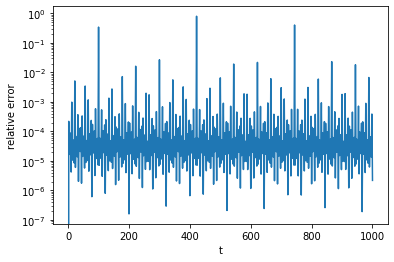

In [14]:
plt.plot(T[::20000],abs((newE-E0)/E0)[::20000])
plt.xlabel('t')
plt.ylabel('relative error')
plt.yscale('log')
plt.show()

이때, 거의 근사적으로 에너지 보존이 이루어지는 것을 확인할 수 있다. 즉, 계산된 궤도는 에너지 보존의 관점에서 매우 정확했다. 

## Problem 4


In [5]:
x=np.linspace(-5,0,1000)
uini=[0,0.1]
BV=0

def deriv(u,x,lam):
    dudx0 = u[1]
    dudx1 = -(lam+x)*u[0]
    return [dudx0,dudx1]

def Calculate1(a, b):
    TOL=1.e-7
    A1,A2=a, b
    B2=0

    err=TOL+1
    loop=-1
    while(abs(err)>TOL):
        loop+=1
        if(loop==0):lam=A1
        if(loop>=1):lam=A2
        uout=odeint(deriv,uini,x,args=(lam,))[-1,0]

        B1=B2
        B2=uout

        if(loop>=1):
            if(B1==B2): break
            err=BV-B2
            yp=A2+(A2-A1)/(B2-B1)*err
            A1=A2
            A2=yp

    sol=A2
    return sol


lambdalist = []

for i in range(40):
    # print('A1={}, A2={}, lambda ={:.2f}'.format(i, i+1, Calculate1(i,i+1)))
    lambdalist.append(Calculate1(i,i+1))
    
lambdalist.sort()
newlambdalist = []
for i in range(40):
    newlambdalist.append(round(lambdalist[i], 4))

newlambdalist1 = list(set(newlambdalist))
newlambdalist1.sort()
print(newlambdalist1)

[2.339, 4.1621, 6.1666, 8.8908, 12.4192, 16.7474, 21.8705, 27.7863, 34.4935, 41.9914, 59.358, 357.807]


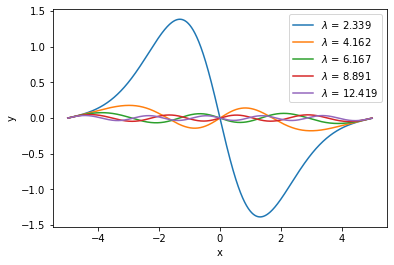

In [8]:
from scipy.integrate import odeint

def deriv(y, t, lambda1):
    dydt0 = y[1]
    dydt1 = -(lambda1-abs(t))*y[0]
    return [dydt0, dydt1]



def plotfunc(n):
    lambda1 = newlambdalist1[n]
    xini = -5
    xmax = 5
    n = 10000
    yini = np.array([0, 0.1])
    t = np.linspace(xini, xmax, n)
    ans = odeint(deriv, yini, t, args=(lambda1,))
    y = ans[:,0]
    yprime = ans[:,1]
    plt.plot(t, y, label = '$\lambda$ = {:.3f}'.format(lambda1))
    plt.legend()
    
for i in range(5):
    plotfunc(i)
    plt.xlabel('x')
    plt.ylabel('y')


